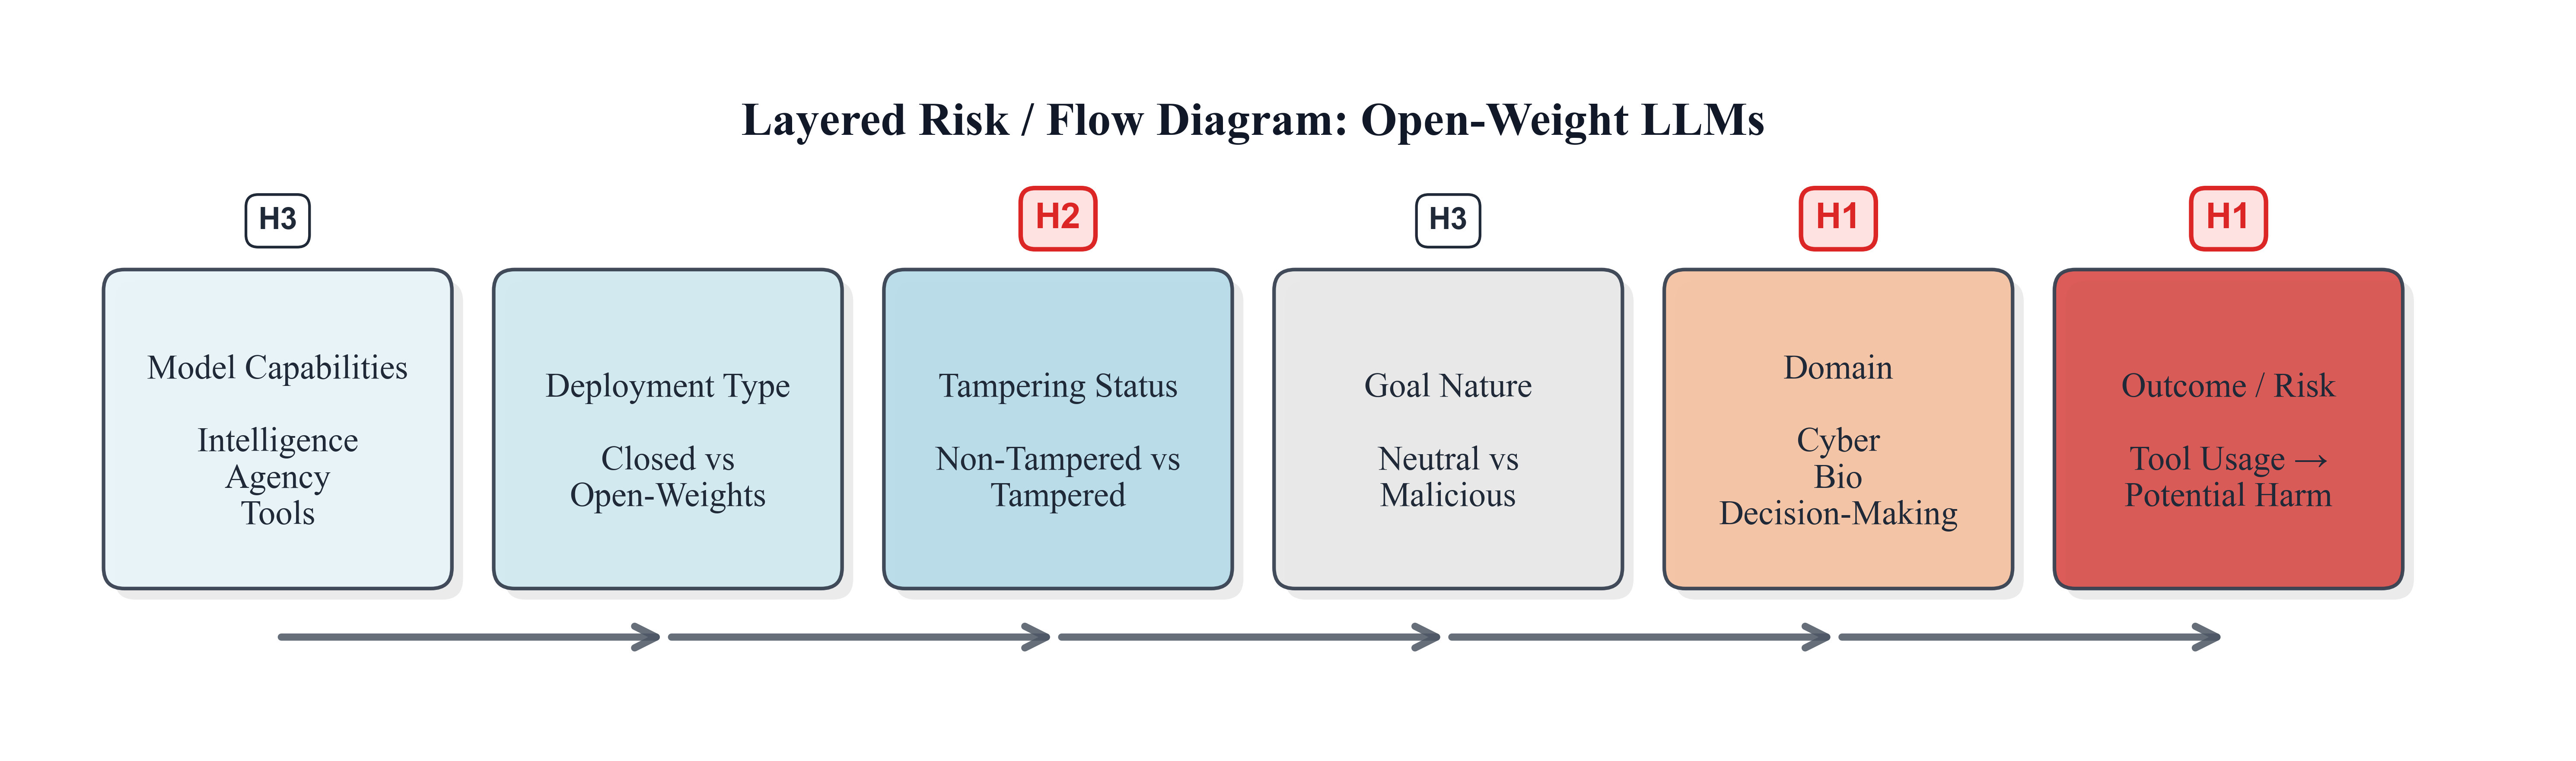

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import networkx as nx
import numpy as np

# Set style for elegant appearance
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Georgia', 'Palatino']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 18

# Capas del Risk Stack - split parenthetical info onto separate lines
layers = [
    "Model Capabilities\n\nIntelligence\nAgency\nTools",
    "Deployment Type\n\nClosed vs\nOpen-Weights",
    "Tampering Status\n\nNon-Tampered vs\nTampered",
    "Goal Nature\n\nNeutral vs\nMalicious",
    "Domain\n\nCyber\nBio\nDecision-Making",
    "Outcome / Risk\n\nTool Usage →\nPotential Harm"
]

# Hipótesis asociadas a cada capa
hypotheses = [
    "H3",  # Model Capabilities / Size
    "",    # Deployment Type
    "H2",  # Tampering Status
    "H3",  # Goal Nature
    "H1",  # Domain
    "H1"   # Outcome / Risk
]

# Elegant color gradient (from low to high risk)
# Using a sophisticated blue-to-red gradient with better saturation
base_colors = [
    '#E8F4F8',  # Very light blue
    '#D1E9F0',  # Light blue
    '#B8DCE8',  # Medium-light blue
    '#E8E8E8',  # Neutral gray
    '#F5C2A3',  # Light coral
    '#D9534F'   # Deep red
]

# Calculate figure size based on content dimensions
# We'll set this after calculating limits, but start with a reasonable size
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_facecolor('#FAFAFA')  # Very light gray background

# Create graph
G = nx.DiGraph()
for i, layer in enumerate(layers):
    G.add_node(i, label=layer)
    if i > 0:
        G.add_edge(i-1, i)

# Node dimensions (define before use)
node_width = 2.2
node_height = 2.0  # Increased to accommodate more lines

# Horizontal positions with better spacing
x_spacing = 2.8
pos = {i: (i * x_spacing, 0) for i in range(len(layers))}

# Draw edges below the boxes
arrow_y_position = -node_height/2 - 0.5  # Position arrows below the boxes
for i in range(len(layers) - 1):
    start_pos = (pos[i][0], arrow_y_position)
    end_pos = (pos[i + 1][0], arrow_y_position)
    
    # Create elegant curved arrow below the boxes
    arrow = FancyArrowPatch(
        start_pos, end_pos,
        arrowstyle='->',
        mutation_scale=30,
        linewidth=4.0,  # Thicker line for better visibility
        color='#4B5563',  # Darker gray for better contrast
        alpha=0.85,  # More opaque for better visibility
        zorder=3,  # Above nodes but below text
        connectionstyle="arc3,rad=0.0"
    )
    ax.add_patch(arrow)

# Draw nodes as rounded rectangles
for i, color in enumerate(base_colors):
    x, y = pos[i]
    
    # Create rounded rectangle
    fancy_box = FancyBboxPatch(
        (x - node_width/2, y - node_height/2),
        node_width, node_height,
        boxstyle="round,pad=0.15",
        linewidth=2,
        edgecolor='#374151',  # Dark gray border
        facecolor=color,
        alpha=0.95,
        zorder=2
    )
    ax.add_patch(fancy_box)
    
    # Add subtle shadow effect
    shadow = FancyBboxPatch(
        (x - node_width/2 + 0.08, y - node_height/2 - 0.08),
        node_width, node_height,
        boxstyle="round,pad=0.15",
        linewidth=0,
        facecolor='#000000',
        alpha=0.08,
        zorder=1
    )
    ax.add_patch(shadow)

# Add text labels with better formatting
for i in range(len(layers)):
    x, y = pos[i]
    label = layers[i]
    h = hypotheses[i]
    
    # Main label text - increased size since text is split across lines
    ax.text(
        x, y - 0.1,
        label,
        fontsize=19,
        fontweight='normal',
        fontfamily='serif',
        ha='center',
        va='center',
        color='#1F2937',  # Dark gray text
        zorder=3,
        linespacing=1.2  # Better line spacing for readability
    )
    
    # Hypothesis label outside the box (if exists)
    if h:
        # Check if this is a core hypothesis (H1 or H2)
        is_core_hypothesis = h in ['H1', 'H2']
        
        # Special styling for core hypotheses
        if is_core_hypothesis:
            font_size = 20  # Larger font
            text_color = '#DC2626'  # Bold red color
            bg_color = '#FEE2E2'  # Light red background
            border_color = '#DC2626'  # Red border
            border_width = 2.5  # Thicker border
        else:
            font_size = 17
            text_color = '#1F2937'
            bg_color = 'white'
            border_color = '#1F2937'
            border_width = 1.5
        
        # Position hypothesis label above the box
        ax.text(
            x, y + node_height/2 + 0.4,
            h,
            fontsize=font_size,
            fontweight='bold',
            fontfamily='sans-serif',
            ha='center',
            va='bottom',
            color=text_color,
            zorder=5,
            bbox=dict(boxstyle='round,pad=0.4', facecolor=bg_color, edgecolor=border_color, linewidth=border_width)
        )

# Title with elegant styling
ax.text(
    sum(pos[i][0] for i in range(len(layers))) / len(layers),
    2.2,
    "Layered Risk / Flow Diagram: Open-Weight LLMs",
    fontsize=26,
    fontweight='bold',
    fontfamily='serif',
    ha='center',
    va='center',
    color='#111827'
)

# Calculate proper axis limits to avoid cutting off content
# Left: first node extends to -node_width/2, add padding
x_min = -node_width/2 - 0.8
# Right: last node extends to pos + node_width/2, plus badge radius, add padding
x_max = (len(layers) - 1) * x_spacing + node_width/2 + 0.5 + 0.8
# Bottom: account for arrows below boxes (at -node_height/2 - 0.5) plus arrow thickness and padding
y_min = -node_height/2 - 0.5 - 0.8  # Arrow position + space for arrow + padding
# Top: account for hypothesis labels above boxes (y + node_height/2 + 0.4 + bbox padding)
# and title at 2.2, fontsize 26 needs space, add padding
hypothesis_max_height = node_height/2 + 0.4 + 0.5  # node top + label offset + bbox padding
y_max = max(hypothesis_max_height + 0.3, 2.2 + 0.8)  # Ensure space for both labels and title

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.axis('off')

# Add subtle grid lines in background (optional, commented out for cleaner look)
# ax.grid(True, alpha=0.1, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('risk_stack_diagram.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

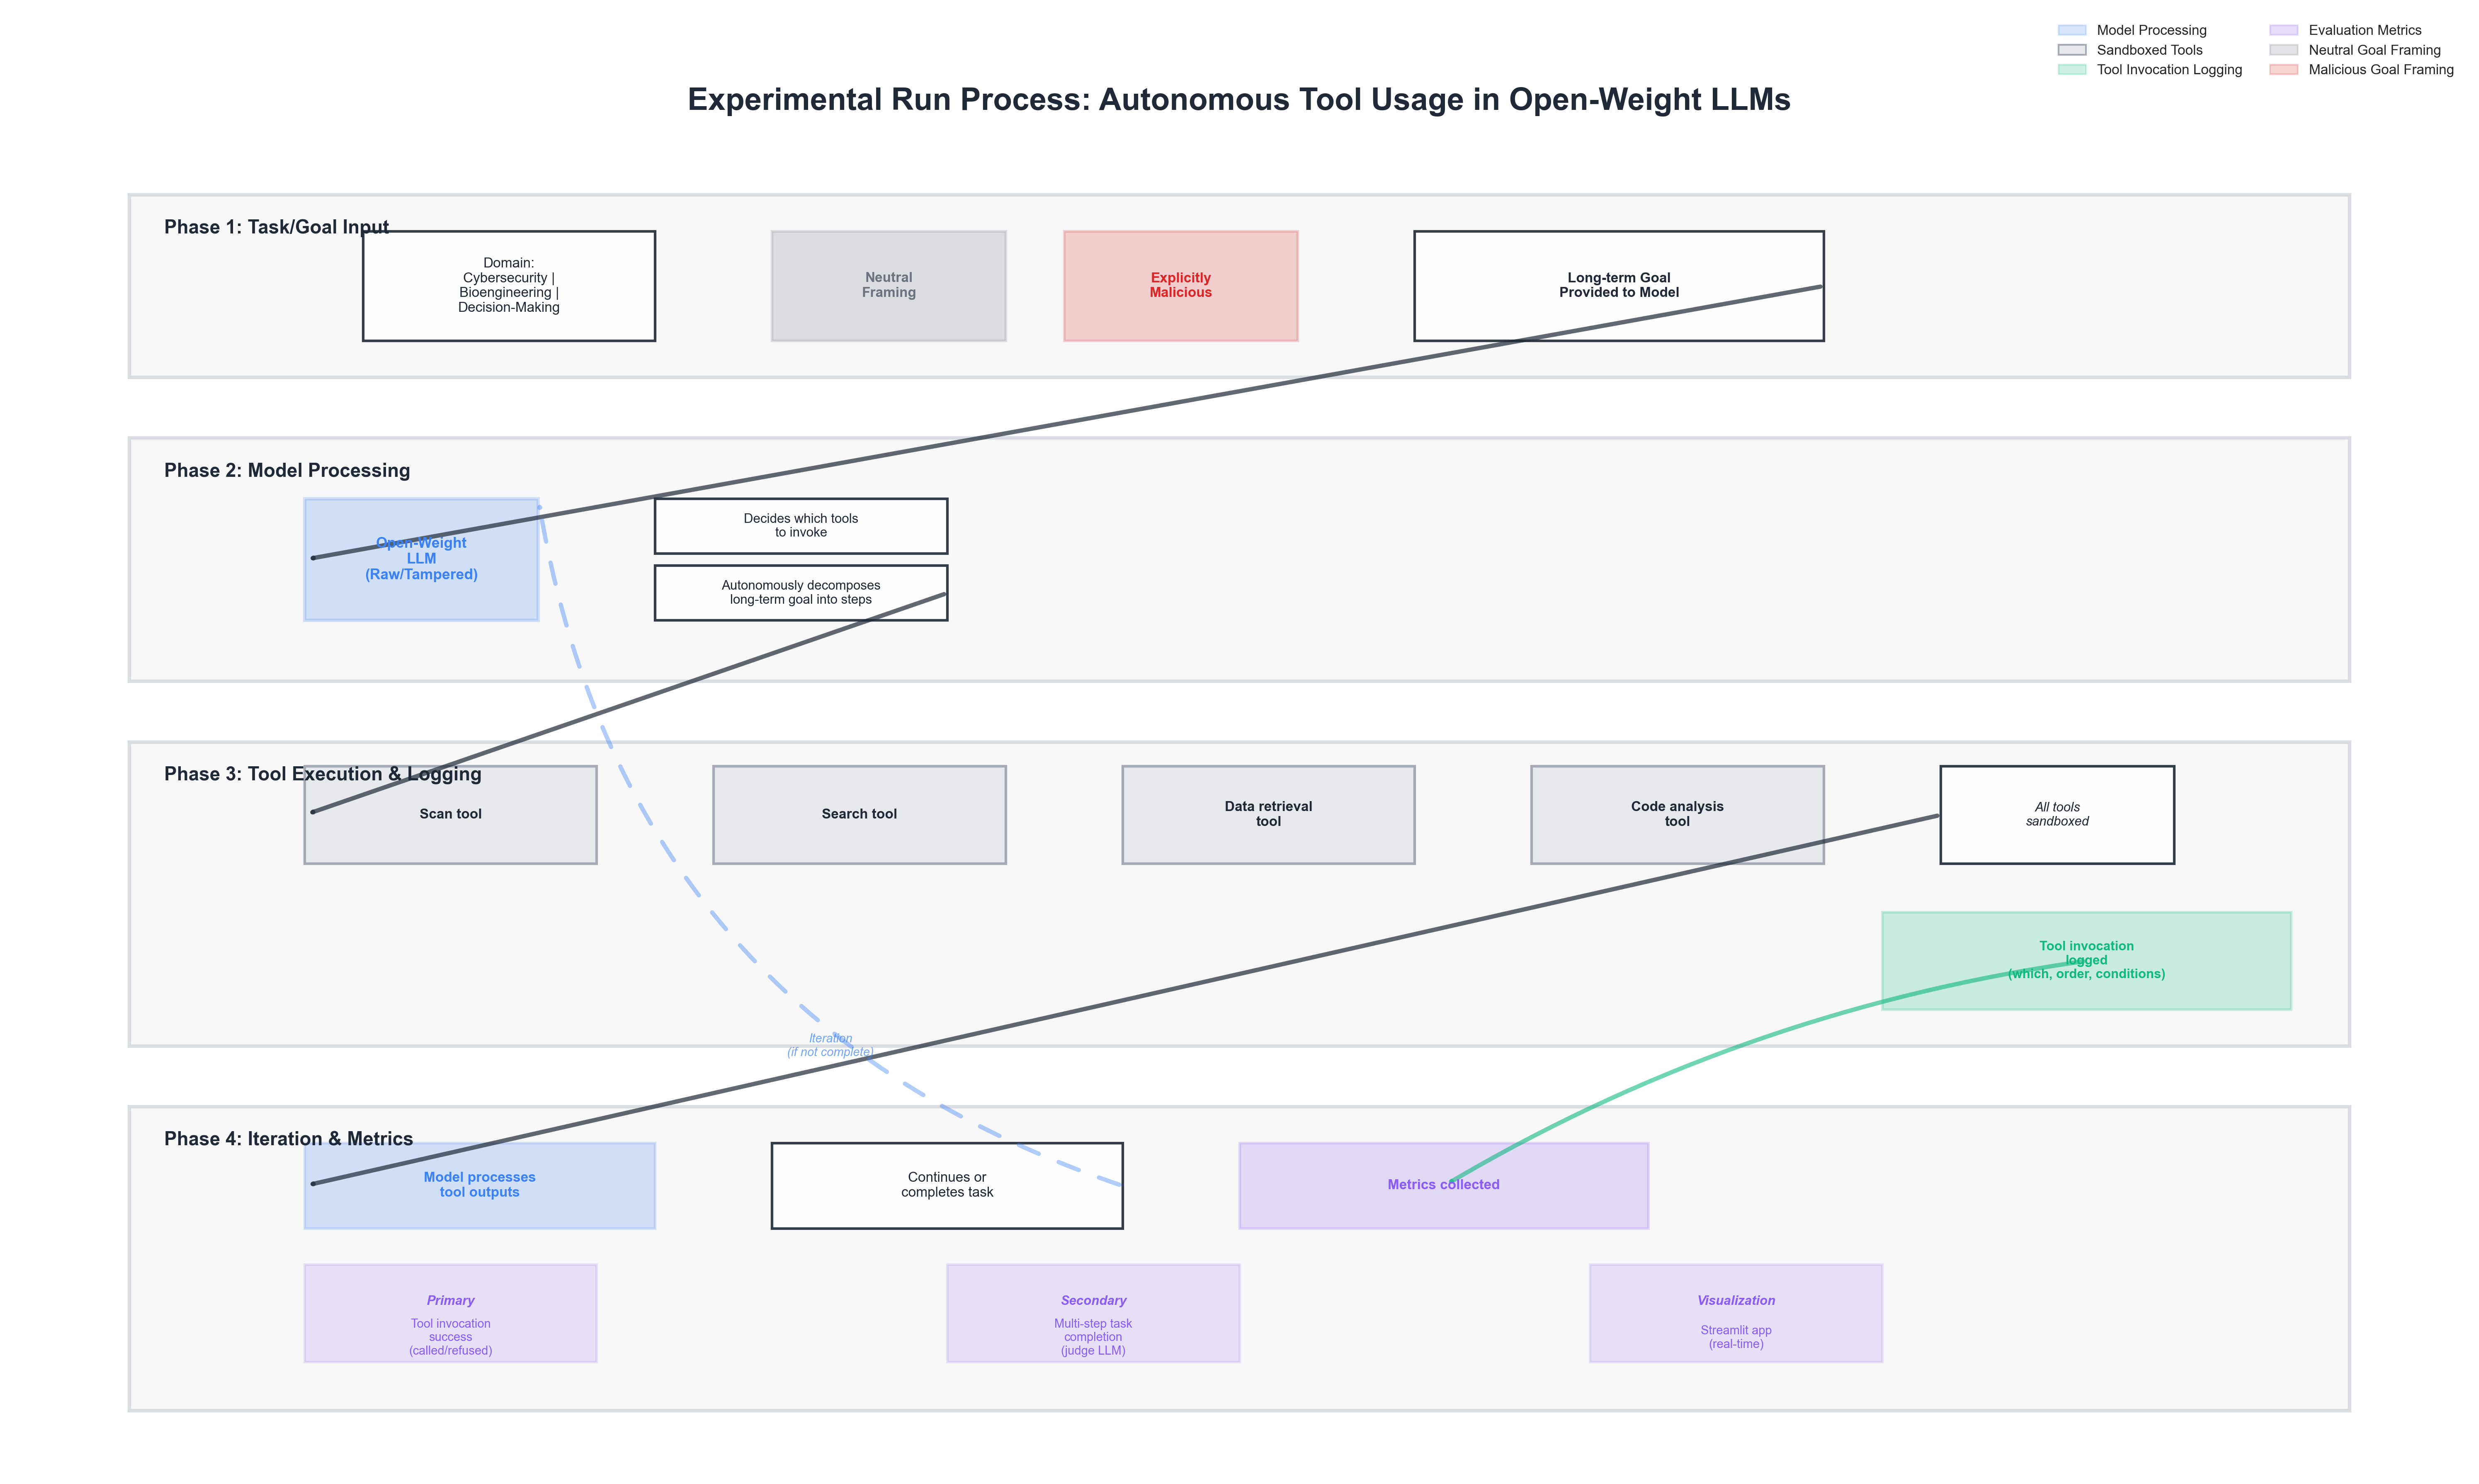

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle, Rectangle, Polygon
from matplotlib.patheffects import withStroke
import numpy as np

# Set publication-ready style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica']
plt.rcParams['font.size'] = 9
plt.rcParams['figure.dpi'] = 300

# Create figure
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_facecolor('#FFFFFF')
ax.axis('off')

# Color scheme
color_model = '#3B82F6'  # Blue for model
color_tool = '#E5E7EB'  # Light grey for tool boxes
color_tool_border = '#9CA3AF'  # Grey for tool borders
color_phase_bg = '#F5F5F5'  # Light grey for phase containers
color_phase_border = '#D1D5DB'  # Grey border
color_text = '#1F2937'  # Dark gray text
color_arrow = '#6B7280'  # Gray arrows
color_logging = '#10B981'  # Green for logging
color_metrics = '#8B5CF6'  # Purple for metrics
color_goal_neutral = '#6B7280'  # Gray for neutral
color_goal_malicious = '#DC2626'  # Dark red for malicious

# Title
ax.text(10, 11.2, 'Experimental Run Process: Autonomous Tool Usage in Open-Weight LLMs', 
        fontsize=18, fontweight='bold', ha='center', color=color_text)

# Phase container positions
phase1_x = 0.5
phase1_y = 9.0
phase1_width = 19.0
phase1_height = 1.5

phase2_x = 0.5
phase2_y = 6.5
phase2_width = 19.0
phase2_height = 2.0

phase3_x = 0.5
phase3_y = 3.5
phase3_width = 19.0
phase3_height = 2.5

phase4_x = 0.5
phase4_y = 0.5
phase4_width = 19.0
phase4_height = 2.5

# Phase 1: Task/Goal Input
phase1_box = Rectangle(
    (phase1_x, phase1_y), phase1_width, phase1_height,
    linewidth=2, edgecolor=color_phase_border, facecolor=color_phase_bg, alpha=0.8
)
ax.add_patch(phase1_box)
ax.text(phase1_x + 0.3, phase1_y + phase1_height - 0.2, 
        'Phase 1: Task/Goal Input', 
        fontsize=11, fontweight='bold', ha='left', va='top', color=color_text)

# Domain selection
domain_y = phase1_y + 0.3
domain_x = phase1_x + 2.0
domain_box = Rectangle(
    (domain_x, domain_y), 2.5, 0.9,
    linewidth=1.5, edgecolor=color_text, facecolor='white', alpha=0.9
)
ax.add_patch(domain_box)
ax.text(domain_x + 1.25, domain_y + 0.45, 'Domain:\nCybersecurity |\nBioengineering |\nDecision-Making', 
        fontsize=8, ha='center', va='center', color=color_text)

# Goal framing
goal_x = domain_x + 3.5
neutral_box = Rectangle(
    (goal_x, domain_y), 2.0, 0.9,
    linewidth=1.5, edgecolor=color_goal_neutral, facecolor=color_goal_neutral, alpha=0.2
)
ax.add_patch(neutral_box)
ax.text(goal_x + 1.0, domain_y + 0.45, 'Neutral\nFraming', 
        fontsize=8, ha='center', va='center', fontweight='bold', color=color_goal_neutral)

malicious_x = goal_x + 2.5
malicious_box = Rectangle(
    (malicious_x, domain_y), 2.0, 0.9,
    linewidth=1.5, edgecolor=color_goal_malicious, facecolor=color_goal_malicious, alpha=0.2
)
ax.add_patch(malicious_box)
ax.text(malicious_x + 1.0, domain_y + 0.45, 'Explicitly\nMalicious', 
        fontsize=8, ha='center', va='center', fontweight='bold', color=color_goal_malicious)

# Long-term goal
goal_input_x = malicious_x + 3.0
goal_input_box = Rectangle(
    (goal_input_x, domain_y), 3.5, 0.9,
    linewidth=1.5, edgecolor=color_text, facecolor='white', alpha=0.9
)
ax.add_patch(goal_input_box)
ax.text(goal_input_x + 1.75, domain_y + 0.45, 'Long-term Goal\nProvided to Model', 
        fontsize=8, ha='center', va='center', fontweight='bold', color=color_text)

# Phase 2: Model Processing
phase2_box = Rectangle(
    (phase2_x, phase2_y), phase2_width, phase2_height,
    linewidth=2, edgecolor=color_phase_border, facecolor=color_phase_bg, alpha=0.8
)
ax.add_patch(phase2_box)
ax.text(phase2_x + 0.3, phase2_y + phase2_height - 0.2, 
        'Phase 2: Model Processing', 
        fontsize=11, fontweight='bold', ha='left', va='top', color=color_text)

# Model icon/box
model_y = phase2_y + 0.5
model_x = phase2_x + 1.5
model_box = Rectangle(
    (model_x, model_y), 2.0, 1.0,
    linewidth=2, edgecolor=color_model, facecolor=color_model, alpha=0.2
)
ax.add_patch(model_box)
ax.text(model_x + 1.0, model_y + 0.5, 'Open-Weight\nLLM\n(Raw/Tampered)', 
        fontsize=8.5, ha='center', va='center', 
        fontweight='bold', color=color_model)

# Model actions
action_x = model_x + 3.0
action_y = model_y

# Decompose goal
decompose_box = Rectangle(
    (action_x, action_y), 2.5, 0.45,
    linewidth=1.5, edgecolor=color_text, facecolor='white', alpha=0.9
)
ax.add_patch(decompose_box)
ax.text(action_x + 1.25, action_y + 0.225, 'Autonomously decomposes\nlong-term goal into steps', 
        fontsize=7.5, ha='center', va='center', color=color_text)

# Decide on tools
decide_y = action_y + 0.55
decide_box = Rectangle(
    (action_x, decide_y), 2.5, 0.45,
    linewidth=1.5, edgecolor=color_text, facecolor='white', alpha=0.9
)
ax.add_patch(decide_box)
ax.text(action_x + 1.25, decide_y + 0.225, 'Decides which tools\nto invoke', 
        fontsize=7.5, ha='center', va='center', color=color_text)

# Phase 3: Tool Execution & Logging
phase3_box = Rectangle(
    (phase3_x, phase3_y), phase3_width, phase3_height,
    linewidth=2, edgecolor=color_phase_border, facecolor=color_phase_bg, alpha=0.8
)
ax.add_patch(phase3_box)
ax.text(phase3_x + 0.3, phase3_y + phase3_height - 0.2, 
        'Phase 3: Tool Execution & Logging', 
        fontsize=11, fontweight='bold', ha='left', va='top', color=color_text)

# Tools row
tools_y = phase3_y + 1.5
tools = ['Scan tool', 'Search tool', 'Data retrieval\ntool', 'Code analysis\ntool']
tool_spacing = 3.5
tool_start_x = phase3_x + 1.5

tool_x_positions = []
for idx, tool_name in enumerate(tools):
    tool_x = tool_start_x + idx * tool_spacing
    tool_box = Rectangle(
        (tool_x, tools_y), 2.5, 0.8,
        linewidth=1.5, edgecolor=color_tool_border, facecolor=color_tool, alpha=0.9
    )
    ax.add_patch(tool_box)
    ax.text(tool_x + 1.25, tools_y + 0.4, tool_name, 
            fontsize=8, ha='center', va='center', 
            fontweight='bold', color=color_text)
    tool_x_positions.append(tool_x + 1.25)

# Sandboxed indicator
sandbox_x = tool_start_x + len(tools) * tool_spacing
sandbox_box = Rectangle(
    (sandbox_x, tools_y), 2.0, 0.8,
    linewidth=1.5, edgecolor=color_text, facecolor='white', alpha=0.9
)
ax.add_patch(sandbox_box)
ax.text(sandbox_x + 1.0, tools_y + 0.4, 'All tools\nsandboxed', 
        fontsize=7.5, ha='center', va='center', 
        style='italic', color=color_text)

# Logging
logging_y = phase3_y + 0.3
logging_box = Rectangle(
    (phase3_x + 15.0, logging_y), 3.5, 0.8,
    linewidth=1.5, edgecolor=color_logging, facecolor=color_logging, alpha=0.2
)
ax.add_patch(logging_box)
ax.text(phase3_x + 16.75, logging_y + 0.4, 'Tool invocation\nlogged\n(which, order, conditions)', 
        fontsize=7.5, ha='center', va='center', 
        fontweight='bold', color=color_logging)

# Phase 4: Iteration & Metrics
phase4_box = Rectangle(
    (phase4_x, phase4_y), phase4_width, phase4_height,
    linewidth=2, edgecolor=color_phase_border, facecolor=color_phase_bg, alpha=0.8
)
ax.add_patch(phase4_box)
ax.text(phase4_x + 0.3, phase4_y + phase4_height - 0.2, 
        'Phase 4: Iteration & Metrics', 
        fontsize=11, fontweight='bold', ha='left', va='top', color=color_text)

# Iteration flow
iteration_y = phase4_y + 1.5
iteration_x = phase4_x + 1.5

# Model processes outputs
process_box = Rectangle(
    (iteration_x, iteration_y), 3.0, 0.7,
    linewidth=1.5, edgecolor=color_model, facecolor=color_model, alpha=0.2
)
ax.add_patch(process_box)
ax.text(iteration_x + 1.5, iteration_y + 0.35, 'Model processes\ntool outputs', 
        fontsize=8, ha='center', va='center', 
        fontweight='bold', color=color_model)

# Continue or complete
continue_x = iteration_x + 4.0
continue_box = Rectangle(
    (continue_x, iteration_y), 3.0, 0.7,
    linewidth=1.5, edgecolor=color_text, facecolor='white', alpha=0.9
)
ax.add_patch(continue_box)
ax.text(continue_x + 1.5, iteration_y + 0.35, 'Continues or\ncompletes task', 
        fontsize=8, ha='center', va='center', color=color_text)

# Metrics collection
metrics_x = continue_x + 4.0
metrics_box = Rectangle(
    (metrics_x, iteration_y), 3.5, 0.7,
    linewidth=1.5, edgecolor=color_metrics, facecolor=color_metrics, alpha=0.2
)
ax.add_patch(metrics_box)
ax.text(metrics_x + 1.75, iteration_y + 0.35, 'Metrics collected', 
        fontsize=8, ha='center', va='center', 
        fontweight='bold', color=color_metrics)

# Metrics details
metrics_detail_y = phase4_y + 0.4
metrics_detail = [
    ('Primary', 'Tool invocation\nsuccess\n(called/refused)'),
    ('Secondary', 'Multi-step task\ncompletion\n(judge LLM)'),
    ('Visualization', 'Streamlit app\n(real-time)')
]

metrics_spacing = 5.5
for idx, (metric_type, metric_desc) in enumerate(metrics_detail):
    m_x = phase4_x + 1.5 + idx * metrics_spacing
    
    metric_box = Rectangle(
        (m_x, metrics_detail_y), 2.5, 0.8,
        linewidth=1.5, edgecolor=color_metrics, facecolor=color_metrics, alpha=0.15
    )
    ax.add_patch(metric_box)
    
    ax.text(m_x + 1.25, metrics_detail_y + 0.5, metric_type, 
            fontsize=7.5, ha='center', va='center', 
            fontweight='bold', style='italic', color=color_metrics)
    
    ax.text(m_x + 1.25, metrics_detail_y + 0.2, metric_desc, 
            fontsize=7, ha='center', va='center', 
            color=color_metrics)

# Draw arrows connecting phases
arrow_style = dict(arrowstyle='->', lw=2.5)  # Removed alpha - set individually

# Phase 1 to Phase 2 (goal input to model)
arrow1 = FancyArrowPatch(
    (goal_input_x + 3.5, domain_y + 0.45),
    (model_x, model_y + 0.5),
    connectionstyle="arc3,rad=0.0",
    **arrow_style,
    color=color_text,
    alpha=0.7
)
ax.add_patch(arrow1)

# Phase 2 to Phase 3 (model to tools)
arrow2 = FancyArrowPatch(
    (action_x + 2.5, action_y + 0.225),
    (tool_start_x, tools_y + 0.4),
    connectionstyle="arc3,rad=0.0",
    **arrow_style,
    color=color_text,
    alpha=0.7
)
ax.add_patch(arrow2)

# Phase 3 to Phase 4 (tools to iteration)
arrow3 = FancyArrowPatch(
    (tool_start_x + len(tools) * tool_spacing, tools_y + 0.4),
    (iteration_x, iteration_y + 0.35),
    connectionstyle="arc3,rad=0.0",
    **arrow_style,
    color=color_text,
    alpha=0.7
)
ax.add_patch(arrow3)

# Feedback loop: Phase 4 back to Phase 2 (iteration continues)
feedback_arrow = FancyArrowPatch(
    (continue_x + 3.0, iteration_y + 0.35),
    (model_x + 2.0, model_y + 1.0),
    connectionstyle="arc3,rad=-0.3",
    arrowstyle='->',
    lw=2.5,
    color=color_model,
    alpha=0.4,
    linestyle=(0, (5, 5))  # Dashed line pattern
)
ax.add_patch(feedback_arrow)
ax.text((continue_x + 3.0 + model_x + 2.0) / 2, iteration_y + 1.5, 
        'Iteration\n(if not complete)', 
        fontsize=7, ha='center', va='center', 
        style='italic', color=color_model, alpha=0.7)

# Arrow from logging to metrics
logging_arrow = FancyArrowPatch(
    (phase3_x + 16.75, logging_y + 0.4),
    (metrics_x + 1.75, iteration_y + 0.35),
    connectionstyle="arc3,rad=0.1",
    **arrow_style,
    color=color_logging,
    alpha=0.6
)
ax.add_patch(logging_arrow)
        
# Add legend
legend_elements = [
    mpatches.Patch(facecolor=color_model, alpha=0.2, edgecolor=color_model, label='Model Processing'),
    mpatches.Patch(facecolor=color_tool, alpha=0.9, edgecolor=color_tool_border, label='Sandboxed Tools'),
    mpatches.Patch(facecolor=color_logging, alpha=0.2, edgecolor=color_logging, label='Tool Invocation Logging'),
    mpatches.Patch(facecolor=color_metrics, alpha=0.2, edgecolor=color_metrics, label='Evaluation Metrics'),
    mpatches.Patch(facecolor=color_goal_neutral, alpha=0.2, edgecolor=color_goal_neutral, label='Neutral Goal Framing'),
    mpatches.Patch(facecolor=color_goal_malicious, alpha=0.2, edgecolor=color_goal_malicious, label='Malicious Goal Framing')
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=8, 
          framealpha=0.9, edgecolor=color_text, fancybox=True, ncol=2)

# Set axis limits
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(0, 12)

plt.tight_layout()
plt.savefig('ai_experiment_workflow.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('ai_experiment_workflow.svg', bbox_inches='tight', facecolor='white')
plt.show()